In [1]:
import numpy  as np
import pandas as pd
import matplotlib.pyplot as plt

from CCplot import auto_plot_style
from CCplot import set_ylimits

In [2]:
pd.set_option('display.max_columns', 500)

auto_plot_style()

In [3]:
n_per_fission  = 3.7
g_per_fission  = 8.3
Cf_t_activity  = 8.9e6                         # fissions/s
Cf_n_activity  = Cf_t_activity * n_per_fission # n/s
Cf_g_activity  = Cf_t_activity * g_per_fission # g/s
long_exposure  = (12 * 24 - 2 - 1.5) * 3600    # s
short_exposure = ( 5 * 24 + 4      ) * 3600    # s

In [4]:
12 * 24 - 2 - 1.5, 5 * 24 + 4      

(284.5, 124)

In [5]:
long_exposure / short_exposure, long_exposure, short_exposure

(2.2943548387096775, 1024200.0, 446400)

In [19]:
sim                    = pd.read_csv("Californication_sim_data.txt", sep=" ")
sim.n_rel_fluence = [0.0002186310073163279, 0.00023481718100490593, 0.0002186310073163279, 6.632892417209902e-05, 6.563467680700739e-05, 0.00022030594201464238, 0.000233401929306977, 0.0002498143547302511, 0.00023335649683814297, 6.517556202914843e-05, 6.507107372750328e-05, 0.00018764840881886852, 0.00019800542131188405, 0.00020810624094394102, 5.945091951467981e-05, 5.8847509693244426e-05, 0.00016658061971271443, 0.00017741616356868552, 0.00019316216666792488, 5.1884325864088785e-05, 5.158767749466425e-05]
sim["n_flux"         ] = sim.n_rel_fluence * Cf_n_activity
sim["em_eflux"       ] = sim.em_dose       * Cf_t_activity * 1e3
sim["n_fluence_short"] = sim.n_flux * short_exposure
sim["n_fluence_long" ] = sim.n_flux *  long_exposure
sim["ng_ratio"       ] = sim.n_flux / sim.em_eflux / 3e2

# All data

In [20]:
sim

crystal position  n_rel_fluence       em_dose  ratio/300000       n_flux  \
0      SP1     near       0.000219  2.727677e-09      1.000984  7199.519071   
1      SP2     near       0.000235  2.849215e-09      1.033169  7732.529770   
2      SP3     near       0.000219  2.974238e-09      1.046023  7199.519071   
3      SP4      far       0.000066  2.595477e-09      0.313676  2184.211473   
4      SP5      far       0.000066  2.586986e-09      0.315049  2161.349907   
5      QZ1     near       0.000220  2.958587e-09      0.926778  7254.674671   
6      QZ3     near       0.000233  3.200854e-09      0.965203  7685.925532   
7      QZ2     near       0.000250  3.392497e-09      0.857535  8226.386701   
8      QZ4     near       0.000233  3.225642e-09      0.902429  7684.429441   
9      QZ5      far       0.000065  2.302627e-09      0.350096  2146.231258   
10     QZ6      far       0.000065  2.952973e-09      0.276000  2142.790458   
11    BaF1     near       0.000188  2.806735e-09      0.831896  6179.262102   
12    BaF2     near       0.000198  2.844160e-09      0.863513  6520.318524   
13    BaF3     near       0.000208  3.234702e-09      0.796740  6852.938514   
14    BaF4      far       0.000059  2.520441e-09      0.293351  1957.718780   
15    BaF5      far       0.000059  2.179275e-09      0.332685  1937.848494   
16    CaF1     near       0.000167  2.434746e-09      0.855850  5485.499807   
17    CaF2     near       0.000177  2.546500e-09      0.875743  5842.314266   
18    CaF3     near       0.000193  2.678793e-09      0.889117  6360.830148   
19    CaF4      far       0.000052  2.238400e-09      0.283831  1708.550851   
20    CaF5      far       0.000052  2.430107e-09      0.265094  1698.782220   

     em_eflux  n_fluence_short  n_fluence_long  ng_ratio  
0   24.276325     3.213865e+09    7.373747e+09  0.988551  
1   25.358013     3.451801e+09    7.919657e+09  1.016448  
2   26.470718     3.213865e+09    7.373747e+09  0.906602  
3   23.099745     9.750320e+08    2.237069e+09  0.315186  
4   23.024176     9.648266e+08    2.213655e+09  0.312910  
5   26.331426     3.238487e+09    7.430238e+09  0.918380  
6   28.487597     3.430997e+09    7.871925e+09  0.899330  
7   30.193221     3.672259e+09    8.425465e+09  0.908194  
8   28.708216     3.430329e+09    7.870393e+09  0.892245  
9   20.493383     9.580776e+08    2.198170e+09  0.349093  
10  26.281458     9.565417e+08    2.194646e+09  0.271775  
11  24.979944     2.758423e+09    6.328800e+09  0.824563  
12  25.313022     2.910670e+09    6.678110e+09  0.858625  
13  28.788852     3.059152e+09    7.018780e+09  0.793471  
14  22.431923     8.739257e+08    2.005096e+09  0.290913  
15  19.395550     8.650556e+08    1.984744e+09  0.333040  
16  21.669236     2.448727e+09    5.618249e+09  0.843823  
17  22.663850     2.608009e+09    5.983698e+09  0.859271  
18  23.841256     2.839475e+09    6.514762e+09  0.889331  
19  19.921761     7.626971e+08    1.749898e+09  0.285877  
20  21.627954     7.583364e+08    1.739893e+09  0.261819

# Neutron flux ratios

In [21]:
# cell i,j means flux[i] / flux[j]
pd.DataFrame(sim.n_flux.values[:, np.newaxis] / sim.n_flux.values, index=sim.crystal, columns=sim.crystal)

crystal       SP1       SP2       SP3       SP4       SP5       QZ1       QZ3  \
crystal                                                                         
SP1      1.000000  0.931069  1.000000  3.296164  3.331029  0.992397  0.936715   
SP2      1.074034  1.000000  1.074034  3.540193  3.577639  1.065869  1.006064   
SP3      1.000000  0.931069  1.000000  3.296164  3.331029  0.992397  0.936715   
SP4      0.303383  0.282470  0.303383  1.000000  1.010577  0.301076  0.284183   
SP5      0.300208  0.279514  0.300208  0.989533  1.000000  0.297925  0.281209   
QZ1      1.007661  0.938202  1.007661  3.321416  3.356548  1.000000  0.943891   
QZ3      1.067561  0.993973  1.067561  3.518856  3.556076  1.059445  1.000000   
QZ2      1.142630  1.063867  1.142630  3.766296  3.806134  1.133943  1.070318   
QZ4      1.067353  0.993779  1.067353  3.518171  3.555384  1.059238  0.999805   
QZ5      0.298108  0.277559  0.298108  0.982611  0.993005  0.295841  0.279242   
QZ6      0.297630  0.277114  0.297630  0.981036  0.991413  0.295367  0.278794   
BaF1     0.858288  0.799126  0.858288  2.829059  2.858983  0.851763  0.803971   
BaF2     0.905660  0.843232  0.905660  2.985205  3.016781  0.898775  0.848345   
BaF3     0.951861  0.886248  0.951861  3.137489  3.170675  0.944624  0.891622   
BaF4     0.271924  0.253180  0.271924  0.896305  0.905785  0.269856  0.254715   
BaF5     0.269164  0.250610  0.269164  0.887207  0.896592  0.267117  0.252129   
CaF1     0.761926  0.709406  0.761926  2.511433  2.537997  0.756133  0.713707   
CaF2     0.811487  0.755550  0.811487  2.674793  2.703086  0.805317  0.760132   
CaF3     0.883508  0.822607  0.883508  2.912186  2.942990  0.876791  0.827595   
CaF4     0.237315  0.220956  0.237315  0.782228  0.790502  0.235510  0.222296   
CaF5     0.235958  0.219693  0.235958  0.777755  0.785982  0.234164  0.221025   

crystal       QZ2       QZ4       QZ5       QZ6      BaF1      BaF2      BaF3  \
crystal                                                                         
SP1      0.875174  0.936897  3.354494  3.359880  1.165110  1.104167  1.050574   
SP2      0.939967  1.006259  3.602841  3.608626  1.251368  1.185913  1.128352   
SP3      0.875174  0.936897  3.354494  3.359880  1.165110  1.104167  1.050574   
SP4      0.265513  0.284239  1.017696  1.019330  0.353474  0.334985  0.318726   
SP5      0.262734  0.281264  1.007044  1.008661  0.349775  0.331479  0.315390   
QZ1      0.881879  0.944075  3.380192  3.385620  1.174036  1.112626  1.058622   
QZ3      0.934302  1.000195  3.581126  3.586877  1.243826  1.178765  1.121552   
QZ2      1.000000  1.070527  3.832945  3.839100  1.331289  1.261654  1.200417   
QZ4      0.934120  1.000000  3.580429  3.586179  1.243584  1.178536  1.121333   
QZ5      0.260896  0.279296  1.000000  1.001606  0.347328  0.329160  0.313184   
QZ6      0.260478  0.278848  0.998397  1.000000  0.346771  0.328633  0.312682   
BaF1     0.751151  0.804128  2.879122  2.883745  1.000000  0.947693  0.901695   
BaF2     0.792610  0.848510  3.038032  3.042910  1.055194  1.000000  0.951463   
BaF3     0.833044  0.891795  3.193010  3.198137  1.109022  1.051013  1.000000   
BaF4     0.237980  0.254764  0.912166  0.913631  0.316821  0.300249  0.285676   
BaF5     0.235565  0.252179  0.902908  0.904357  0.313605  0.297202  0.282776   
CaF1     0.666818  0.713846  2.555875  2.559980  0.887727  0.841293  0.800460   
CaF2     0.710192  0.760280  2.722127  2.726498  0.945471  0.896017  0.852527   
CaF3     0.773223  0.827756  2.963721  2.968480  1.029383  0.975540  0.928190   
CaF4     0.207692  0.222339  0.796070  0.797349  0.276498  0.262035  0.249317   
CaF5     0.206504  0.221068  0.791519  0.792790  0.274917  0.260537  0.247891   

crystal      BaF4      BaF5      CaF1      CaF2      CaF3      CaF4      CaF5  
crystal                                                                        
SP1      3.677504  3.715213  1.312464  1.232306  1.131852  4.213816  4.238047  
SP2      3.949765  3.990265  1.4

# $\gamma$ flux ratios

In [22]:
# cell i,j means flux[i] / flux[j]
pd.DataFrame(sim.em_eflux.values[:, np.newaxis] / sim.em_eflux.values, index=sim.crystal, columns=sim.crystal)

crystal       SP1       SP2       SP3       SP4       SP5       QZ1       QZ3  \
crystal                                                                         
SP1      1.000000  0.957343  0.917101  1.050935  1.054384  0.921953  0.852172   
SP2      1.044557  1.000000  0.957965  1.097762  1.101365  0.963032  0.890142   
SP3      1.090392  1.043880  1.000000  1.145931  1.149692  1.005290  0.929202   
SP4      0.951534  0.910945  0.872653  1.000000  1.003282  0.877269  0.810870   
SP5      0.948421  0.907965  0.869798  0.996729  1.000000  0.874399  0.808218   
QZ1      1.084655  1.038387  0.994738  1.139901  1.143642  1.000000  0.924312   
QZ3      1.173472  1.123416  1.076193  1.233243  1.237291  1.081886  1.000000   
QZ2      1.243731  1.190678  1.140627  1.307080  1.311370  1.146661  1.059873   
QZ4      1.182560  1.132116  1.084527  1.242794  1.246873  1.090264  1.007744   
QZ5      0.844172  0.808162  0.774191  0.887169  0.890081  0.778286  0.719379   
QZ6      1.082596  1.036416  0.992850  1.137738  1.141472  0.998102  0.922558   
BaF1     1.028984  0.985091  0.943682  1.081395  1.084944  0.948674  0.876871   
BaF2     1.042704  0.998226  0.956265  1.095814  1.099411  0.961324  0.888563   
BaF3     1.185882  1.135296  1.087574  1.246284  1.250375  1.093327  1.010575   
BaF4     0.924025  0.884609  0.847424  0.971090  0.974277  0.851907  0.787428   
BaF5     0.798949  0.764869  0.732717  0.839643  0.842399  0.736593  0.680842   
CaF1     0.892608  0.854532  0.818612  0.938073  0.941151  0.822942  0.760655   
CaF2     0.933578  0.893755  0.856186  0.981130  0.984350  0.860715  0.795569   
CaF3     0.982078  0.940186  0.900665  1.032100  1.035488  0.905430  0.836900   
CaF4     0.820625  0.785620  0.752596  0.862423  0.865254  0.756577  0.699313   
CaF5     0.890907  0.852904  0.817052  0.936285  0.939358  0.821374  0.759206   

crystal       QZ2       QZ4       QZ5       QZ6      BaF1      BaF2      BaF3  \
crystal                                                                         
SP1      0.804032  0.845623  1.184593  0.923705  0.971833  0.959045  0.843254   
SP2      0.839858  0.883302  1.237376  0.964863  1.015135  1.001777  0.880828   
SP3      0.876711  0.922061  1.291672  1.007201  1.059679  1.045735  0.919478   
SP4      0.765064  0.804639  1.127181  0.878937  0.924732  0.912564  0.802385   
SP5      0.762561  0.802006  1.123493  0.876062  0.921706  0.909578  0.799760   
QZ1      0.872097  0.917209  1.284875  1.001901  1.054103  1.040232  0.914640   
QZ3      0.943510  0.992315  1.390088  1.083943  1.140419  1.125413  0.989536   
QZ2      1.000000  1.051728  1.473316  1.148841  1.208699  1.192794  1.048782   
QZ4      0.950817  1.000000  1.400853  1.092337  1.149251  1.134128  0.997199   
QZ5      0.678741  0.713851  1.000000  0.779766  0.820393  0.809598  0.711851   
QZ6      0.870442  0.915468  1.282436  1.000000  1.052102  1.038258  0.912904   
BaF1     0.827336  0.870132  1.218927  0.950478  1.000000  0.986842  0.867695   
BaF2     0.838368  0.881734  1.235180  0.963151  1.013334  1.000000  0.879265   
BaF3     0.953487  1.002809  1.404788  1.095405  1.152479  1.137314  1.000000   
BaF4     0.742946  0.781376  1.094593  0.853527  0.897997  0.886181  0.779188   
BaF5     0.642381  0.675610  0.946430  0.737994  0.776445  0.766228  0.673717   
CaF1     0.717685  0.754810  1.057377  0.824507  0.867465  0.856051  0.752695   
CaF2     0.750627  0.789455  1.105911  0.862351  0.907282  0.895343  0.787244   
CaF3     0.789623  0.830468  1.163364  0.907151  0.954416  0.941857  0.828142   
CaF4     0.659809  0.693939  0.972107  0.758016  0.797510  0.787016  0.691996   
CaF5     0.716318  0.753372  1.055363  0.822936  0.865813  0.854420  0.751261   

crystal      BaF4      BaF5      CaF1      CaF2      CaF3      CaF4      CaF5  
crystal                                                                        
SP1      1.082222  1.251644  1.120313  1.071147  1.018249  1.218583  1.122451  
SP2      1.130443  1.307414  1.1

# Neutron flux

Mean | std neutron flux in far : 1992.2 |  200.9 n/cm2/s
Min  | max neutron flux in far : 1698.8 | 2184.2 n/cm2/s
Mean | std neutron flux in near: 6940.3 |  818.8 n/cm2/s
Min  | max neutron flux in near: 5485.5 | 8226.4 n/cm2/s


Text(0, 0.5, 'Neutron flux [n/cm2/s]')

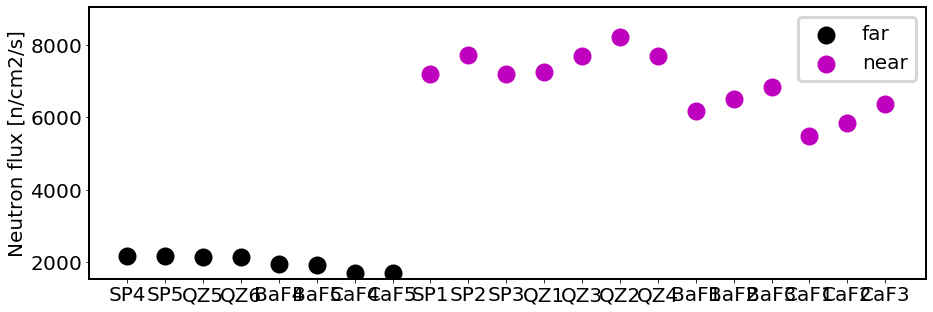

In [23]:
plt.figure(figsize=(15, 5))
for where, data in sim.groupby("position"):
    x, y = data.crystal, data.n_flux
    plt.scatter(x, y, label=where)
    print(f"Mean | std neutron flux in {where:<4}: {y.mean():.1f} | {y.std():>6.1f} n/cm2/s")
    print(f"Min  | max neutron flux in {where:<4}: {y.min ():.1f} | {y.max():>6.1f} n/cm2/s")

plt.legend()
set_ylimits(sim.n_flux)
plt.ylabel("Neutron flux [n/cm2/s]")

# $\gamma$ energy flux

Mean | std EM energy flux in far : 22.0 |    2.2 MeV/cm2/s
Min  | max EM energy flux in far : 19.4 |   26.3 MeV/cm2/s
Mean | std EM energy flux in near: 25.9 |    2.6 MeV/cm2/s
Min  | max EM energy flux in near: 21.7 |   30.2 MeV/cm2/s


Text(0, 0.5, 'EM energy flux [MeV/cm2/s]')

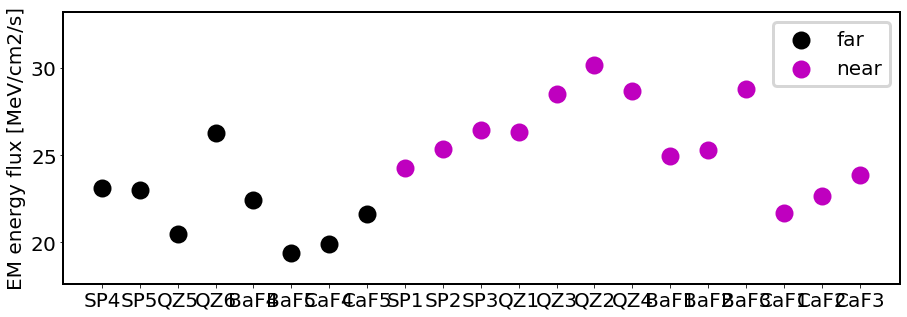

In [24]:
plt.figure(figsize=(15, 5))
for where, data in sim.groupby("position"):
    x, y = data.crystal, data.em_eflux
    plt.scatter(x, y, label=where)
    print(f"Mean | std EM energy flux in {where:<4}: {y.mean():.1f} | {y.std():>6.1f} MeV/cm2/s")
    print(f"Min  | max EM energy flux in {where:<4}: {y.min ():.1f} | {y.max():>6.1f} MeV/cm2/s")
    
plt.legend()
set_ylimits(sim.em_eflux)
plt.ylabel("EM energy flux [MeV/cm2/s]")

Mean | std n/EM flux in far : 0.3 |    0.0 n/MeV
Min  | max n/EM flux in far : 0.3 |    0.3 n/MeV
Mean | std n/EM flux in near: 0.9 |    0.1 n/MeV
Min  | max n/EM flux in near: 0.8 |    1.0 n/MeV


Text(0, 0.5, 'EM energy flux [n/MeV/300]')

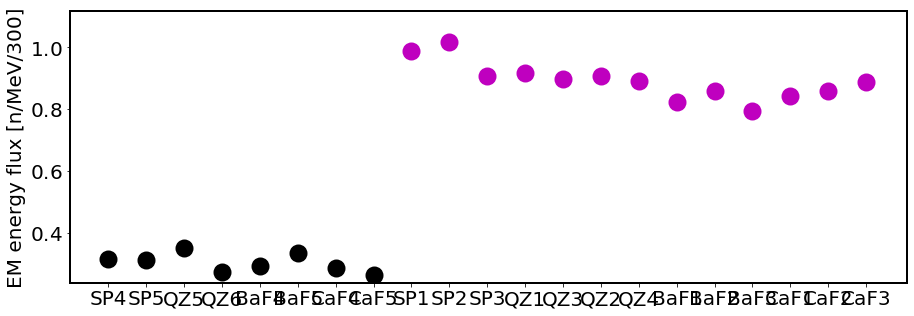

In [25]:
plt.figure(figsize=(15, 5))
for where, data in sim.groupby("position"):
    x, y = data.crystal, data.ng_ratio
    plt.scatter(x, y)
    print(f"Mean | std n/EM flux in {where:<4}: {y.mean():.1f} | {y.std():>6.1f} n/MeV")
    print(f"Min  | max n/EM flux in {where:<4}: {y.min ():.1f} | {y.max():>6.1f} n/MeV")
    
set_ylimits(sim.ng_ratio)
plt.ylabel("EM energy flux [n/MeV/300]")

# EM dose comparison

In [26]:
# San Francisco (doses in mGy, time in h)
sf_Cf_gamma , sf_Cf_gamma_u , sf_Cf_gamma_t  = 2.90, 0.75, 64.3 * 3600
sf_Co_short , sf_Co_short_u , sf_Co_short_t  =   90,   15,  1   * 3600
sf_Co_medium, sf_Co_medium_u, sf_Co_medium_t =  270,   41,  3   * 3600
sf_Co_long  , sf_Co_long_u  , sf_Co_long_t   = 1600,  240, 17.8 * 3600

sf_gamma_dose     = [sf_Cf_gamma  , sf_Co_short  , sf_Co_medium  , sf_Co_long  ]
sf_gamma_dose_u   = [sf_Cf_gamma_u, sf_Co_short_u, sf_Co_medium_u, sf_Co_long_u]
sf_gamma_exposure = [sf_Cf_gamma_t, sf_Co_short_t, sf_Co_medium_t, sf_Co_long_t]

In [27]:
# Californication
caf_em_dose_short = sim.em_dose * 1.602176462e-7 * Cf_t_activity * short_exposure * 1e3 # mGy
caf_em_dose_long  = sim.em_dose * 1.602176462e-7 * Cf_t_activity *  long_exposure * 1e3 # mGy

In [28]:
plt.rcParams["font.size"] = 20

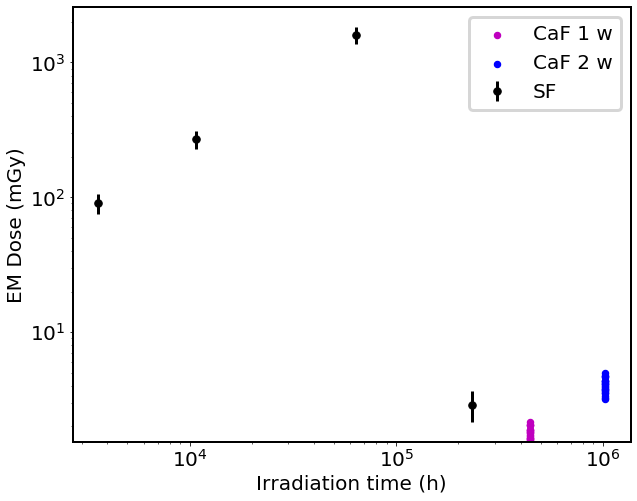

In [29]:
plt.errorbar(sf_gamma_exposure, sf_gamma_dose, sf_gamma_dose_u                 , fmt=".k"  , label="SF"     )
plt.scatter (np.full_like(caf_em_dose_short, short_exposure), caf_em_dose_short, s=20, c="m", label="CaF 1 w")
plt.scatter (np.full_like(caf_em_dose_long ,  long_exposure), caf_em_dose_long , s=20, c="b", label="CaF 2 w")

plt.legend()
plt.xlabel("Irradiation time (h)")
plt.ylabel("EM Dose (mGy)")
plt.xscale("log")
plt.yscale("log")

# Neutron fluence comparison

In [30]:
sf_n_fluences  = 3.8e4 * sf_Cf_gamma_t, 8e4 * sf_Cf_gamma_t # n/cm2
sf_n_fluence   = np.mean(sf_n_fluences)
sf_n_fluence_u = np.max (sf_n_fluences) - sf_n_fluence

Text(0.5, 0, 'n fluence (n/cm2)')

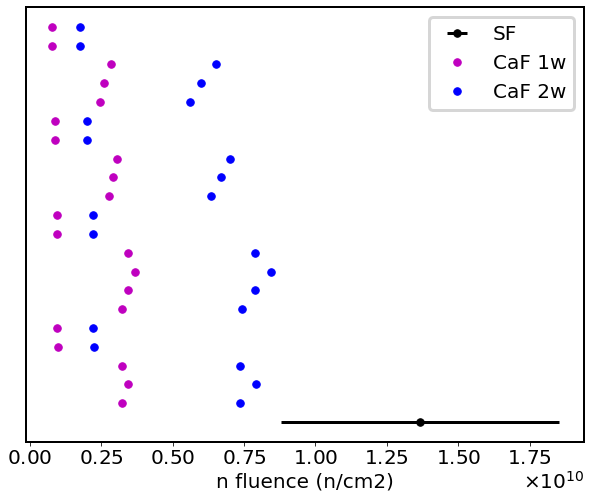

In [31]:
plt.errorbar(sf_n_fluence       ,                       0, None, sf_n_fluence_u, fmt=".k", label="SF"    )
plt.errorbar(sim.n_fluence_short, np.arange(len(sim)) + 1,                       fmt=".m", label="CaF 1w")
plt.errorbar(sim.n_fluence_long , np.arange(len(sim)) + 1,                       fmt=".b", label="CaF 2w")

plt.yticks([])
plt.legend()

plt.xlabel("n fluence (n/cm2)")

In [43]:
new_sim  = 0.0002815273687240231, 0.0002958163887233431, 0.00029435143945663725, 0.0002773917190182879, 0.00024153171370329177, 0.00023898638819512357, 0.00023490542620226127, 0.0002353021145887555, 0.00023153865199818617, 0.0002402033919819759, 0.0002243858505333583, 0.00021905164960975344, 0.00020854727698545064, 0.0002066880521835838, 0.0002039151907087831, 0.0002067775391426867, 0.00021470109467309806, 0.00022672773221347022, 0.0001968087443528524, 0.000193060242512278, 0.00018248433271286289, 0.0001820786446324025, 0.00018277085019321817, 0.00018478661161687606, 0.00019301833229363192, 0.00020117818900343477, 0.0001768080497885753, 0.00016534709145742848, 0.00016630586391115531, 0.00016696196175995258, 0.0001676920508574109, 0.00017504496063935763, 0.00016198319844259125, 0.00015334846742707324, 0.00015128308312143247, 0.00015353037260257382, 0.00014961485729241063, 0.00016277432828846087, 0.00013972687147829226, 0.00013825469840524673, 0.0003044646796696396, 0.0003104021222819313
new_sim  = np.array(new_sim)
new_sim *= n_per_fission  # n / cm2 / fission
new_sim *= 3.4e8 * 0.03   # n / cm2 / s
new_sim *=  sf_Cf_gamma_t # n/cm2

Text(0.5, 0, 'n fluence (n/cm2)')

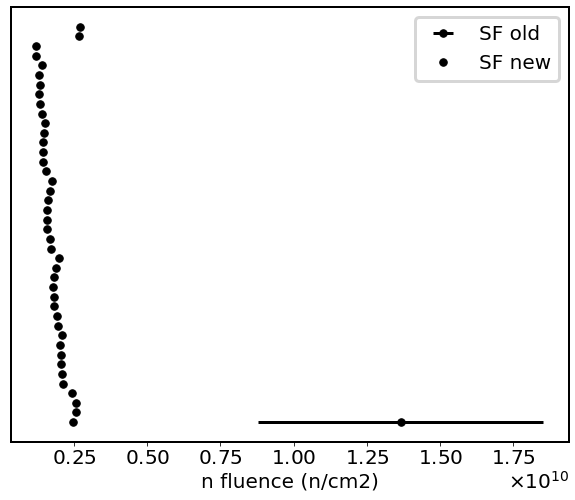

In [44]:
plt.errorbar(sf_n_fluence,                       0, None, sf_n_fluence_u, fmt=".k", label="SF old")
plt.errorbar(new_sim     , np.arange(len(new_sim)), None,           None, fmt=".k", label="SF new")

plt.yticks([])
plt.legend()

plt.xlabel("n fluence (n/cm2)")